<a href="https://colab.research.google.com/github/SIDDXSingh/RCNN/blob/main/RCNN2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import torch
import pandas as pd
import os
import torchvision
from torchvision import transforms
import skimage
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy as sc
from google.colab.patches import cv2_imshow
import matplotlib.patches as mpatches
from torch.utils.data import Dataset, DataLoader
import cv2
from matplotlib import cm
from PIL import Image as im
import torchvision.models as models
import copy
from sklearn import svm
from sklearn.metrics import accuracy_score
import h5py

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np

from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset
from torch.utils.data import random_split
import time
from torchsummary import summary

In [ ]:
from csv import DictWriter
import ast

In [ ]:
def get_device():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = get_device()

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
def imshow(img, ret=False):
    npimg = img.numpy()
    img=np.transpose(npimg, (1, 2, 0))
    if(ret==True):
      return img
    plt.imshow(img)
    plt.show()

In [ ]:
objects = np.array(['aeroplane', 'bicycle', 'bird', 'boat',
        'bottle', 'bus', 'car', 'cat', 'chair',
        'cow', 'diningtable', 'dog', 'horse',
        'motorbike', 'person', 'pottedplant',
        'sheep', 'sofa', 'train', 'tvmonitor','null'])

In [ ]:
transform1 = transforms.Compose([ transforms.Resize((500,500)),transforms.ToTensor()])

In [ ]:
trainset = torchvision.datasets.VOCDetection(root='/content/VOC',
              image_set='train',download= True, transform=transform1 )

testset=torchvision.datasets.VOCDetection(root='/content/VOC',
                    image_set='val',download= True,transform=transform1 )

#trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          #shuffle=True, num_workers=2, collate_fn=collate_fn)

#testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                          #shuffle=True, num_workers=2,collate_fn=collate_fn)


Extracting /content/VOC/VOCtrainval_11-May-2012.tar to /content/VOC
Using downloaded and verified file: /content/VOC/VOCtrainval_11-May-2012.tar
Extracting /content/VOC/VOCtrainval_11-May-2012.tar to /content/VOC


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=2, collate_fn=collate_fn)

testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                          shuffle=True, num_workers=2,collate_fn=collate_fn)

In [ ]:
'''dic_path = '/content/drive/MyDrive/VOC/VOCdevkit/VOC2012/ImageSets/Main'

object_categories = ['aeroplane', 'bicycle', 'bird', 'boat',
        'bottle', 'bus', 'car', 'cat', 'chair',
        'cow', 'diningtable', 'dog', 'horse',
        'motorbike', 'person', 'pottedplant',
        'sheep', 'sofa', 'train', 'tvmonitor']

train_all = []
val_all = []

def read_all():
    files = os.listdir(dic_path)
    for fi in files:
        if('trainval' not in fi):
            num = int(1)
            for i,str in enumerate(object_categories,int(1)):
                if (str in fi):
                    num = i
                    break
            if('train' in fi):
                f = open(dic_path+"/"+fi)
                iter_f = iter(f)
                for line in iter_f:
                    line = line[0:11]
                    train_all.append([line,num])
            else:
                f = open(dic_path+"/"+fi)
                iter_f = iter(f)
                for line in iter_f:
                    line = line[0:11]
                    val_all.append([line,num])
read_all()'''

'dic_path = \'/content/drive/MyDrive/VOC/VOCdevkit/VOC2012/ImageSets/Main\'\n\nobject_categories = [\'aeroplane\', \'bicycle\', \'bird\', \'boat\',\n        \'bottle\', \'bus\', \'car\', \'cat\', \'chair\',\n        \'cow\', \'diningtable\', \'dog\', \'horse\',\n        \'motorbike\', \'person\', \'pottedplant\',\n        \'sheep\', \'sofa\', \'train\', \'tvmonitor\']\n\ntrain_all = []\nval_all = []\n\ndef read_all():\n    files = os.listdir(dic_path)\n    for fi in files:\n        if(\'trainval\' not in fi):\n            num = int(1)\n            for i,str in enumerate(object_categories,int(1)):\n                if (str in fi):\n                    num = i\n                    break\n            if(\'train\' in fi):\n                f = open(dic_path+"/"+fi)\n                iter_f = iter(f)\n                for line in iter_f:\n                    line = line[0:11]\n                    train_all.append([line,num])\n            else:\n                f = open(dic_path+"/"+fi)\n       

In [ ]:
'''class Data(Dataset):
    def __init__(self,li,transform=transform,size=(224,224)):
        self.transform = transform
        self.size = size
        self.img = []
        self.lab = []
        for i in li:
            self.img.append(i[0])
            self.lab.append(int(i[1]))
    def __getitem__(self, index):
        img_path = '/content/drive/MyDrive/VOCdevkit/VOC2012/JPEGImages'+self.img[index]+'.jpg'
        image = cv2.imread(img_path)

        cv2_imshow(image)
        image = image.transpose((2, 0, 1))
        image = torch.from_numpy(image)
        label = torch.LongTensor([self.lab[index]])
        return image,label
    def __len__(self):
        return len(self.img)'''

"class Data(Dataset):\n    def __init__(self,li,transform=transform,size=(224,224)):\n        self.transform = transform\n        self.size = size\n        self.img = []\n        self.lab = []\n        for i in li:\n            self.img.append(i[0])\n            self.lab.append(int(i[1]))\n    def __getitem__(self, index):\n        img_path = '/content/drive/MyDrive/VOCdevkit/VOC2012/JPEGImages'+self.img[index]+'.jpg'\n        image = cv2.imread(img_path)\n\n        cv2_imshow(image)\n        image = image.transpose((2, 0, 1))\n        image = torch.from_numpy(image)\n        label = torch.LongTensor([self.lab[index]])\n        return image,label\n    def __len__(self):\n        return len(self.img)"

In [ ]:
dataiter=iter(trainloader)
a=dataiter.next()

In [ ]:
len(labels)

In [ ]:
labels[0]['annotation']['filename'].split('.')[0]

In [ ]:
plt.imshow(images[0].permute(1,2,0))
plt.show()

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
def selective_search_custom(image):
  if (type(image)!='numpy.ndarray'):
    image=image.numpy()
  ss.setBaseImage(image)
  ss.switchToSelectiveSearchFast()
  rects = ss.process()
  boxes=[]
  for i, rect in (enumerate(rects)):
        x1, y1, w, h = rect
        x2=x1+w
        y2=y1+h
        boxes.append([x1,y1,x2,y2])
  return np.array(boxes,dtype='int')

In [ ]:
#to get bounding box coordinates from labels
def bboxcord(labels, name=None):
  boxes=[]
  #names=[]
  k=0
  for j in labels['annotation']['object']:
    if (name==None) or (j['name']!=name):
      continue
    x2=int(int(j['bndbox']['xmax'])*(224.0/int(labels['annotation']['size']['width'])))
    x1=int(int(j['bndbox']['xmin'])*(224.0/int(labels['annotation']['size']['width'])))
    y2=int(int(j['bndbox']['ymax'])*(224.0/int(labels['annotation']['size']['height'])))
    y1=int(int(j['bndbox']['ymin'])*(224.0/int(labels['annotation']['size']['height'])))
    boxes.append([x1, y1, x2, y2])
  boxes=np.array(boxes)
  retval={'bbox':boxes}
  return retval

In [ ]:
#to get bounding box coordinates from labels
def bboxcord_test(labels, size):
  boxes=[]
  names=[]
  k=0
  for j in labels['annotation']['object']:
    x2=int(int(j['bndbox']['xmax'])*(size*1.0/int(labels['annotation']['size']['width'])))
    x1=int(int(j['bndbox']['xmin'])*(size*1.0/int(labels['annotation']['size']['width'])))
    y2=int(int(j['bndbox']['ymax'])*(size*1.0/int(labels['annotation']['size']['height'])))
    y1=int(int(j['bndbox']['ymin'])*(size*1.0/int(labels['annotation']['size']['height'])))
    boxes.append([x1, y1, x2, y2])
    names.append(j['name'])
  boxes=np.array(boxes)
  retval={'bbox':boxes,'name':np.array(names)}
  return retval

In [ ]:
def area(box):
  dim1= np.abs(box[:,0]-box[:,2])
  dim2=np.abs(box[:,1]-box[:,3])
  area=np.multiply(dim1,dim2)

  return np.reshape(area.astype('float32'),(-1,1))


In [ ]:
def nms(gnd_boxes, bound_boxes, thresh):



  a_gnd=np.reshape(area(gnd_boxes),(len(gnd_boxes),1,-1))
  a_prob=area(bound_boxes)
  xymax=np.maximum(np.reshape(gnd_boxes[:,0:2],(len(gnd_boxes),1,2)),bound_boxes[:,0:2])
  xymin=np.minimum(np.reshape(gnd_boxes[:,2:4],(len(gnd_boxes),1,2)),bound_boxes[:,2:4])



  dim1=(xymin-xymax)
  dim1[:,:,0][dim1[:,:,0]<=0]=0
  dim1[:,:,1][dim1[:,:,1]<=0]=0

  intersection=np.multiply(dim1[:,:,0],dim1[:,:,1])
  intersection[intersection<=0]=0
  
  sum=a_gnd+ a_prob
  intersection=np.reshape(intersection.astype('float64'),sum.shape)
  union=sum-intersection
  iou=intersection/union

  idxs=np.where(iou>=thresh)
  #return(xymax,xymin)
  #srect = np.concatenate((xymax,xymin),axis=2)
  nms_boxes=bound_boxes[idxs[1]]
  lis={'iou':iou,'idxs':idxs,'nms_box':nms_boxes}

  return lis



In [ ]:
def one_hot_encode(classes, labels):
  classes=np.array(classes)
  one_hot_vect=np.identity(len(classes))
  retval=[]
  for i in labels:
    #retval.append(one_hot_vect[np.where(classes==i)][0])
    retval.append([np.where(classes==i)[0]])

  return retval

In [ ]:
def crop(img, box_list,size):
  crop_list=torch.empty((len(box_list),size[0],size[1],3))
  crop_regions=torch.empty
  i=0
  for x1, y1,x2,y2 in box_list:
    crop=img[:,y1:y2+1,x1:x2+1]
    crop=transforms.functional.resize(crop,size)
    crop=transforms.functional.normalize(crop,(0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    crop=crop.permute(1, 2, 0)
    crop_list[i]=crop
    i=i+1
  return crop_list

In [ ]:
#For SVM
def crop(img, box_list,size):
  crop_list=torch.empty((len(box_list),size[0],size[1],3))
  crop_regions=torch.empty
  i=0
  for x1, y1,x2,y2 in box_list:
    img=img.permute(2, 0, 1)
    crop=img[:,y1:y2+1,x1:x2+1]*1.0
    crop=transforms.functional.resize(crop,size)
    crop=transforms.functional.normalize(crop,(0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    crop=crop.permute(1, 2, 0)
    plt.imshow(crop)
    plt.show()
    crop_list[i]=crop
    i=i+1
  return crop_list

In [ ]:
"""#Using selective search in opencv
images_crop_list=[]

name=[]

crop_labels_list=[]

svm_crops=torch.tensor([])
svm_labels=torch.tensor([])


for  i, data in enumerate(trainloader,0):
  
  images,labels = data
  train_crops=torch.tensor([])


  if (i!=0)and (i%1==0):


    svm_labels=svm_labels.reshape(-1)
    dict1={'image_crops': images_crop_list,
          'image_labels':crop_labels_list}

    dict2= {'svm_crops':svm_crops.numpy(),
          'svm_labels':svm_labels.numpy()}
    df1 = pd.DataFrame(dict1)
    df2=pd.DataFrame(dict2)
    df1.to_csv('/content/drive/MyDrive/region.csv')
    df2.to_csv('/content/drive/MyDrive/svm.csv')

    del images_crop_list
    del crop_labels_list
    del svm_labels
    del svm_crops

    del df1
    del df2


    svm_crops=torch.tensor([])
    svm_labels=torch.tensor([])

    images_crop_list=[]
    crop_labels_list=[]


  for j, image in enumerate(images):

    inputs=image.to(device, non_blocking=True)

    lab=labels[j]
    gnd_boxes=bboxcord(lab)
    inputs1 = inputs.permute(1, 2, 0)

  #  boxes=np.array(selective_search.box_filter(select_search, min_size=20, topN=80))
    
    boxes=selective_search_custom(inputs1)


    gnd_truth=crop(inputs,gnd_boxes['bbox'],(224,224))

    svm_crops=torch.cat((svm_crops,gnd_truth),dim=0)
    svm_oneHot=torch.tensor(one_hot_encode(object_categories, gnd_boxes['name']))

    svm_labels=torch.cat((svm_labels,svm_oneHot.reshape((len(svm_oneHot))) ),dim=0)
    


    lis=nms(gnd_boxes['bbox'], boxes,0.3)

    iou=lis['iou']

    positive_idxs=np.where(iou>0.5)
    postive_boxes=boxes[positive_idxs[1]]



    positive_labels=gnd_boxes['name'][positive_idxs[0]]
    positive_oneHot=one_hot_encode(object_categories, positive_labels)


    negative_idxs=np.where(iou<0.3)
    negative_boxes=boxes[negative_idxs[1]][0:30]
    negative_labels=np.repeat(['null'],len(negative_boxes))
    negative_oneHot=one_hot_encode(object_categories, negative_labels)

    svm_labels=torch.cat((svm_labels, torch.tensor(negative_oneHot).reshape(len(negative_oneHot))),0)
    label=torch.tensor(positive_oneHot+negative_oneHot)

    label1=torch.reshape(label,(len(label),1))


    crop_labels_list.append(torch.unsqueeze(label1,dim=0).type(torch.LongTensor))


    positive_crops=crop(inputs,postive_boxes,(224,224))
    negative_crops=crop(inputs,negative_boxes,(224,224))

    svm_crops=torch.cat((svm_crops,negative_crops),dim=0)

    crops=torch.cat((positive_crops,negative_crops),dim=0)

    images_crop_list.append(torch.unsqueeze(crops,dim=0))
    print(len(images_crop_list))


    name.append(positive_labels)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(inputs1)

    for x1, y1, x2, y2 in postive_boxes:
      bbox = mpatches.Rectangle((x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='blue', linewidth=1)
      ax.add_patch(bbox)
    for x1, y1,x2,y2 in gnd_boxes['bbox']:
      bbox = mpatches.Rectangle((x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='red', linewidth=1)
      ax.add_patch(bbox)
    plt.axis('off')
    plt.show()
"""

In [ ]:
def DictAppend(file_loc,l_dict):
  #field_names = ['name','label'] 

  with open(file_loc, 'a') as f_object: 
      
    # Pass the file object and a list  
    # of column names to DictWriter() 
    # You will get a object of DictWriter 
    df=pd.DataFrame.from_dict(l_dict) 
    df.to_csv(f_object, header=False)
    #dictwriter_object = DictWriter(f_object, fieldnames=field_names) 
  
    #Pass the dictionary as an argument to the Writerow() 
    #dictwriter_object.writerow(dict) 
  
    #Close the file object 
    f_object.close()

In [ ]:
"""#dataset for CNN FINE TUNING
crops=[]
label=[]
p=0
n=0
os.mkdir('/content/X')
os.mkdir('/content/X/X_pos')
os.mkdir('/content/X/X_neg')
os.mkdir('/content/Y')

field_names = ['name','label','gnd_boxes','pred_boxes']
df = pd.DataFrame(columns = field_names)
df.to_csv('/content/Y/N.csv')
df.to_csv('/content/Y/P.csv')
c=0
for i, data in enumerate(trainloader,0):

  crops=[]
  label=[]

  p=0
  n=0
  inputs=data[0][0]
  lab=data[1][0]

  gnd_boxes=bboxcord_test(lab,500)
  inputs1 = inputs.permute(1, 2, 0)

  #  boxes=np.array(selective_search.box_filter(select_search, min_size=20, topN=80))
    
  boxes=selective_search_custom(inputs1)

  gnd_truth=crop(inputs,gnd_boxes['bbox'],(224,224))
  lis=nms(gnd_boxes['bbox'], boxes,0.6)

  iou=lis['iou']

  positive_idxs=np.where(iou>=0.6)
  postive_boxes=boxes[positive_idxs[1]]
  positive_labels=gnd_boxes['name'][positive_idxs[0]]
  positive_oneHot=one_hot_encode(objects, positive_labels)
  positive_gnd=gnd_boxes['bbox'][np.where(iou>=0.6)[0]]

  negative_idxs=np.where(iou<0.3)
  negative_boxes=boxes[negative_idxs[1]]
  negative_labels=np.repeat(['null'],len(negative_boxes))
  negative_oneHot=one_hot_encode(objects, negative_labels)

  #positive_crops=crop(inputs,postive_boxes,(224,224))
  #negative_crops=crop(inputs,negative_boxes,(224,224))[0:len(positive_crops)]

  #crops=[torch.cat((crop(inputs,postive_boxes,(224,224))],crop(inputs,negative_boxes,(224,224))[0:len(postive_boxes)]),dim=0)]
  crops=[crop(inputs,postive_boxes,(224,224),False,0)]
  label=[positive_oneHot]


  field_names1 = ['name','label']
  field_names2=['gnd_boxes','pred_boxes']

  df1 = pd.DataFrame(columns = field_names1)
  df2= pd.DataFrame(columns = field_names2)

  for j,image in enumerate(crops[0]):

    list_dict1={'name':str(i)+'_P'+str(p)+'.jpg'
                ,'label':label[0][j][0],
                  'gnd_boxes':[positive_gnd[p]],
                 'pred_boxes':[postive_boxes[p]]}

    Y_loc1='/content/Y/P.csv'
    name='/content/X/X_pos/'+str(i)+'_P'+str(p)+'.jpg'
    p=p+1
    image=image.numpy()
    image[image>1]=1
    image[image<0]=0
    DictAppend(Y_loc1,list_dict1)
    plt.imsave(name,image)
  del crops
  del label

  crops=[crop(inputs,negative_boxes,(224,224),True,len(postive_boxes))]
  label=[negative_oneHot]

  for j,image in enumerate(crops[0]):
    list_dict1={'name':'N_'+str(c)+'.jpg'
                ,'label':20,
                'gnd_boxes':[[0,0,0,0]],
                 'pred_boxes':[negative_boxes[n]]}
    Y_loc1='/content/Y/N.csv'
    Y_loc2='/content/Y/N_boxes.csv'
    name='/content/X/X_neg/N_'+str(c)+'.jpg'

    n=n+1
    c=c+1
    DictAppend(Y_loc1,list_dict1)

    image=image.numpy()
    image[image>1]=1
    image[image<0]=0
    plt.imsave(name,image)
    #plt.axis('off')
    #fig.axes.get_xaxis().set_visible(False)
    #fig.axes.get_yaxis().set_visible(False)
    #plt.savefig(name, bbox_inches='tight', pad_inches = 0)


  print(i)

  del crops
  del label
"""

In [ ]:
#dataset for CNN FINE TUNING
label=[]
p=0
n=0

os.mkdir('/content/Y')

field_names = ['name','label','gnd_boxes','pred_boxes']
df = pd.DataFrame(columns = field_names)
df.to_csv('/content/Y/N.csv')
df.to_csv('/content/Y/P.csv')
c=0
for i, data in enumerate(trainloader,0):
  
  label=[]
  p=0
  n=0

  inputs=data[0][0]
  lab=data[1][0]

  gnd_boxes=bboxcord_test(lab,500)
  inputs1 = inputs.permute(1, 2, 0)

  #  boxes=np.array(selective_search.box_filter(select_search, min_size=20, topN=80))
    
  boxes=selective_search_custom(inputs1)

  lis=nms(gnd_boxes['bbox'], boxes,0.6)

  iou=lis['iou']

  positive_idxs=np.where(iou>=0.6)
  postive_boxes=boxes[positive_idxs[1]]
  positive_labels=gnd_boxes['name'][positive_idxs[0]]

  positive_oneHot=one_hot_encode(objects, positive_labels) #coordinates of positive region proposals
  positive_gnd=gnd_boxes['bbox'][np.where(iou>=0.6)[0]]   #coordinates of gnd truth corresponding to positive region proposals

  negative_idxs=np.where(iou<0.3)
  negative_boxes=boxes[negative_idxs[1]]
  negative_labels=np.repeat(['null'],len(negative_boxes))
  negative_oneHot=one_hot_encode(objects, negative_labels)

  label=[positive_oneHot]
  field_names1 = ['name','label']
  field_names2=['gnd_boxes','pred_boxes']

  df1 = pd.DataFrame(columns = field_names1)
  df2= pd.DataFrame(columns = field_names2)

  for j in range(len(postive_boxes)):

    list_dict1={'name':lab['annotation']['filename'].split('.')[0]+'_P'+str(p)
                ,'label':label[0][j][0],
                  'gnd_boxes':[positive_gnd[p]],
                 'pred_boxes':[postive_boxes[p]]}

    Y_loc1='/content/Y/P.csv'
    p=p+1
    DictAppend(Y_loc1,list_dict1)

  del label

  label=[negative_oneHot]

  for j in range(len(negative_boxes)):
    list_dict1={'name':lab['annotation']['filename'].split('.')[0]+'_N'+str(n)
                ,'label':20,
                'gnd_boxes':[[0,0,0,0]],
                 'pred_boxes':[negative_boxes[n]]}
    Y_loc1='/content/Y/N.csv'
    if(n>len(postive_boxes)):
      break
    n=n+1
    DictAppend(Y_loc1,list_dict1)

    
    #plt.axis('off')
    #fig.axes.get_xaxis().set_visible(False)
    #fig.axes.get_yaxis().set_visible(False)
    #plt.savefig(name, bbox_inches='tight', pad_inches = 0)
  print(i)
  del label

Streaming output truncated to the last 5000 lines.
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
9

In [ ]:
def new_crop(img, box_list,size):
  x1, y1,x2,y2 = box_list
  crop=img[y1:y2+1,x1:x2+1,:]
  crop=torch.tensor(crop,dtype=torch.uint8)
  crop=crop.permute(2,0,1)
  crop=transforms.functional.convert_image_dtype(crop,dtype=torch.float32)
  crop=transforms.functional.resize(crop,size)
  crop=transforms.functional.normalize(crop,(0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
  return crop

In [ ]:
class CNN(Dataset):
    def __init__(self,img_loc,Lab_loc,transform=transform1,pos=True):
        
        self.loc=img_loc
        self.img = []
        self.lab = []
        self.gnd=[]
        self.pred=[]
        self.cond=pos
        dic=pd.DataFrame.to_dict((pd.read_csv(Lab_loc)))
        for i in range(len(dic['name'])):
          self.img.append(dic['name'][i])
          self.lab.append(dic['label'][i])
          #a=dic['gnd_boxes'][i].replace('  ',' ').replace(' ',',')
          a=dic['gnd_boxes'][i]
          b=dic['pred_boxes'][i]
          if (pos):
            a=",".join(a.split())
            b= ",".join(b.split())
            a=a.replace(',','',1) if (a[1]==',') else a
            b=b.replace(',','',1) if (b[1]==',')  else b
          else:
            b= ",".join(b.split())
            b=b.replace(',','',1) if (b[1]==',')  else b
          self.gnd.append(ast.literal_eval(a))
          self.pred.append(ast.literal_eval(b))
    def __getitem__(self, index):
        img_path = self.loc+self.img[index]
        if (self.cond):
          img_path = self.loc+self.img[index].split('_P')[0]+'.jpg'
        else:
          img_path = self.loc+self.img[index].split('_N')[0]+'.jpg'
        image = cv2.imread(img_path)
        image= cv2.resize(image,(500,500))
        image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image_crop = new_crop(image,self.gnd[index],(224,224))
        
        label = torch.LongTensor([self.lab[index]])
        gnd_box = torch.tensor(self.gnd[index])
        pred_box = torch.tensor(self.pred[index])
        return image_crop,label,gnd_box,pred_box
    def __len__(self):
        return len(self.img)

In [ ]:
"""dataset1=CNN(img_loc='/content/VOC/VOCdevkit/VOC2012/JPEGImages/',Lab_loc='/content/Y/P.csv',transform=transform1,pos=True)
dataloader1=DataLoader(dataset=dataset1, batch_size=2,num_workers=2,shuffle=True)"""

In [ ]:
"""dataiter=iter(dataloader1)
image,label,gnd,pred=dataiter.next()"""

In [ ]:
transform = transforms.Compose([ transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),transforms.ToTensor()])

In [ ]:
model = models.alexnet(pretrained=True, progress=True)
model.classifier[6]=nn.Linear(4096, 21)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
step_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 2, gamma= 0.1)
model=model.to(device)

In [ ]:
dataset1=CNN(img_loc='/content/VOC/VOCdevkit/VOC2012/JPEGImages/',Lab_loc='/content/Y/P.csv',transform=transform1,pos=True)
dataloader1=DataLoader(dataset=dataset1, batch_size=32,num_workers=2,shuffle=True)
dataset2=CNN(img_loc='/content/VOC/VOCdevkit/VOC2012/JPEGImages/',Lab_loc='/content/Y/N.csv',transform=transform1,pos=False)
dataloader2=DataLoader(dataset=dataset2, batch_size=96,num_workers=2,shuffle=True)

In [ ]:
loss_list=[]
index_list=[]
c=0
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(zip(dataloader1,dataloader2), 0):
        data1,data2=data
        inputs, labels,gnd,pred = data1
        inputs=torch.cat((inputs,data2[0]),dim=0)
        labels=torch.cat((labels,data2[1]),dim=0)
        gnd=torch.cat((gnd,data2[2]),dim=0)
        pred=torch.cat((pred,data2[3]),dim=0)
        inputs=inputs.to(device)
        labels=labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        labels = labels.squeeze_()
        # forward + backward + optimize
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels)    
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i== 1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %f' %
                  (epoch + 1, i + 1, running_loss /128))
            loss_list.append(running_loss/128)
            running_loss = 0.0
    index_list.append(epoch)
print('Finished Training')

[1,     2] loss: 0.032781
[2,     2] loss: 0.009141
[3,     2] loss: 0.005347
[4,     2] loss: 0.004789
[5,     2] loss: 0.003677


In [ ]:
state = {
    'epoch': epoch,
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    ...
}
torch.save(state, "/content/drive/MyDrive/MODEL_JULY_2021")

In [ ]:
model=torch.load('/content/drive/MyDrive/model/model.pt')

In [ ]:
dataiter=iter(dataloader1)
img,label,gnd,pred=dataiter.next()

In [ ]:
img[0].size()

In [ ]:
plt.imshow(img[31].permute(1,2,0))
plt.show()

In [ ]:
def svm_feat_extract(train_images,model):
    outputs_feat=[]
    for inputs in train_images:
        inputs = inputs.to(device)
        with torch.no_grad():
          outputs = model(inputs)
          outputs_feat.append(outputs.numpy())

    return np.array(outputs_feat)

In [ ]:
"""object_categories = {'aeroplane': {'images': torch.tensor([]),
                                   'labels':[] },
                     'bicycle': {'images': torch.tensor([]),
                                   'labels':[] },  
                     'bird': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'boat': {'images': torch.tensor([]),
                                   'labels':[] },
                     'bottle': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'bus': {'images': torch.tensor([]),
                                   'labels': []}, 
                     'car': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'cat': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'chair': {'images': torch.tensor([]),
                                   'labels':[] },
                     'cow': {'images': torch.tensor([]),
                                   'labels': []}, 
                     'diningtable': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'dog': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'horse': {'images': torch.tensor([]),
                                   'labels':[] },
                     'motorbike': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'person': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'pottedplant': {'images': torch.tensor([]),
                                   'labels':[] },
                     'sheep': {'images': torch.tensor([]),
                                   'labels': []}, 
                     'sofa': {'images': torch.tensor([]),
                                   'labels': []}, 
                     'train': {'images': torch.tensor([]),
                                   'labels':[] }, 
                     'tvmonitor': {'images': torch.tensor([]),
                                   'labels':[] },
                     'null': {'images': torch.tensor([]),
                                   'labels':[] }}"""

In [ ]:
object_categories = {'aeroplane': {'images': [],
                                   'labels':[] },
                     'bicycle': {'images': [],
                                   'labels':[] },  
                     'bird': {'images': [],
                                   'labels':[] }, 
                     'boat': {'images': [],
                                   'labels':[] },
                     'bottle': {'images': [],
                                   'labels':[] }, 
                     'bus': {'images': [],
                                   'labels': []}, 
                     'car': {'images': [],
                                   'labels':[] }, 
                     'cat': {'images': [],
                                   'labels':[] }, 
                     'chair': {'images': [],
                                   'labels':[] },
                     'cow': {'images': [],
                                   'labels': []}, 
                     'diningtable': {'images': [],
                                   'labels':[] }, 
                     'dog': {'images': [],
                                   'labels':[] }, 
                     'horse': {'images': [],
                                   'labels':[] },
                     'motorbike': {'images': [],
                                   'labels':[] }, 
                     'person': {'images': [],
                                   'labels':[] }, 
                     'pottedplant': {'images': [],
                                   'labels':[] },
                     'sheep': {'images': [],
                                   'labels': []}, 
                     'sofa': {'images': [],
                                   'labels': []}, 
                     'train': {'images': [],
                                   'labels':[] }, 
                     'tvmonitor': {'images': [],
                                   'labels':[] },
                     'null': {'images': [],
                                   'labels':[] }}

In [ ]:
for i, data in enumerate(trainloader,0):
  images, labels=data
  print(len(labels))
  for image,j in zip(images,labels):
    names_list=[]

    for obj in j['annotation']['object']:
      name=obj['name']
      if name in names_list:
        continue
      object_categories[name]['images'].append(labels[0]['annotation']['filename'])
      object_categories[name]['labels'].append(j)
      names_list.append(name)
  print(i)

In [ ]:
def torch_read(image_loc):
  img=cv2.imread(image_loc)
  img=cv2.resize(img,(500,500))
  img=torch.tensor(img)
  img=transforms.functional.convert_image_dtype(img,dtype=torch.float32)
  return img


In [ ]:
object_categories['aeroplane']['images'][0]

'2009_001541.jpg'

In [ ]:
hf1 = h5py.File('/content/SVMweights.h5', 'w')

for obj in objects:
  if(True):
    a=object_categories[obj]
    svm_crops=torch.tensor([])
    svm_labels=np.array([])
    i=0
    for image,label in zip(a['images'],a['labels']):
      
      inputs1=torch_read('/content/VOC/VOCdevkit/VOC2012/JPEGImages/'+image)
      print(inputs1.size())
      plt.imshow(inputs1)
      plt.show()


      gnd_boxes=bboxcord(label,obj)

      #  boxes=np.array(selective_search.box_filter(select_search, min_size=20, topN=80))

      gnd_truth=crop(inputs1,gnd_boxes['bbox'],(224,224))


      svm_crops=torch.cat((svm_crops,gnd_truth),dim=0)
      svm_labs=np.repeat(1,len(gnd_truth))
      svm_labels=np.append(svm_labels,svm_labs)
      #svm_labels=torch.cat((svm_labels,svm_labs.reshape((len(svm_labs))) ),dim=0)
      lis=nms(gnd_boxes['bbox'], boxes,0.3)


      iou=lis['iou']

      negative_idxs=np.where(iou<0.3)
      negative_boxes=boxes[negative_idxs[1]][0:len(gnd_truth)]
      negative_labels=np.repeat(0,len(negative_boxes))
      #negative_oneHot=one_hot_encode(object_categories, negative_labels)

      svm_labels=np.append(svm_labels,negative_labels)
      #svm_labels=torch.cat((svm_labels, torch.tensor(),0)

      negative_crops=crop(inputs,negative_boxes,(224,224))

      svm_crops=torch.cat((svm_crops,negative_crops),dim=0)
      
      if(svm_crops.size()[0]>600):
        break
    svm_crops=torch.unsqueeze(svm_crops,dim=0).permute(0,1,4,2,3)
  # svm_labels1=svm_labels.reshape(len(svm_labels)).type(torch.LongTensor)
    #svm_labels1.size()

    SVM_X=np.squeeze(svm_feat_extract(svm_crops,model))
    SVM_Y=svm_labels

    print(obj)
    
    SVM_classifier = svm.LinearSVC()
    SVM_classifier.fit(SVM_X, SVM_Y)
    del svm_crops
    del svm_labels
    weights=SVM_classifier.coef_
    hf1.create_dataset(obj, data=weights)
hf1.close()

In [ ]:
loss_list=[1.665411,0.019348,0.019829,0.019041,0.019449,0.019672,0.020051,0.018906,0.020086,0.019661]

In [ ]:
plt.plot(index_list,loss_list)
plt.show()

In [ ]:
dataiter=iter(testloader)
images,labels=dataiter.next()

In [ ]:
gnd=bboxcord_test(labels[0],500)

In [ ]:
g=gnd['bbox']
g.astype('int32')

array([[ 26,  37, 421, 429]], dtype=int32)

In [ ]:
img=crop(images[0],g,(224,224))

({'annotation': {'filename': '2010_000799.jpg',
   'folder': 'VOC2012',
   'object': [{'bndbox': {'xmax': '421',
      'xmin': '26',
      'ymax': '322',
      'ymin': '28'},
     'difficult': '0',
     'name': 'cat',
     'occluded': '0',
     'pose': 'Right',
     'truncated': '0'}],
   'segmented': '0',
   'size': {'depth': '3', 'height': '375', 'width': '500'},
   'source': {'annotation': 'PASCAL VOC2010',
    'database': 'The VOC2010 Database',
    'image': 'flickr'}}},)

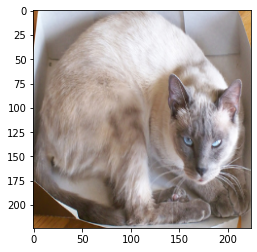

In [ ]:
plt.imshow(img[0])
labels

In [ ]:
m = nn.Softmax(dim=1)
j=nn.ReLU()

In [ ]:
a=model(img[0].permute(2,0,1).unsqueeze(dim=0))

In [ ]:
a

tensor([[-0.6716, -1.1849, -0.6869, -1.4176, -1.4368, -0.9662, -0.1776, -0.6287,
         -0.3436, -1.4565, -1.4247, -0.5038, -1.1721, -0.9339,  0.8973, -1.2808,
         -1.4109, -1.0357, -1.1224, -0.8927,  3.2837]],
       grad_fn=<AddmmBackward>)

In [ ]:
m(a)

tensor([[0.0139, 0.0083, 0.0137, 0.0066, 0.0065, 0.0103, 0.0228, 0.0145, 0.0193,
         0.0063, 0.0065, 0.0164, 0.0084, 0.0107, 0.0667, 0.0076, 0.0066, 0.0097,
         0.0088, 0.0111, 0.7252]], grad_fn=<SoftmaxBackward>)

In [ ]:
objects

array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
       'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
       'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor',
       'null'], dtype='<U11')

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
torch.save(model, '/content/drive/MyDrive/model/model.pt')

In [ ]:
h1 = h5py.File('/content/drive/MyDrive/SVM_weights/SVMweights.h5', 'r')
h2 = h5py.File('/content/drive/MyDrive/SVM_weights/SVMweightsAnkush.h5', 'r')
h3 = h5py.File('/content/drive/MyDrive/SVM_weights/SVMweightsMihir.h5', 'r')
h4 = h5py.File('/content/drive/MyDrive/SVM_weights/SVMweights_dog.h5', 'r')
h5 = h5py.File('/content/drive/MyDrive/SVM_weights/SVMweights_rest3.h5', 'r')

In [ ]:
w1 = np.array(h1.get('aeroplane'))
w2 = np.array(h1.get('bicycle'))
w3 = np.array(h1.get('bird'))
w4 = np.array(h1.get('boat'))
w5 = np.array(h1.get('bottle'))
w6 = np.array(h1.get('bus'))
w7 = np.array(h5.get('car'))
w8 = np.array(h1.get('cat'))
w9 = np.array(h5.get('chair'))
w10 = np.array(h3.get('cow'))
w11 = np.array(h3.get('diningtable'))
w12 = np.array(h4.get('dog'))
w13 = np.array(h3.get('horse'))
w14 = np.array(h3.get('motorbike'))
w15 = np.array(h5.get('person'))
w16 = np.array(h2.get('pottedplant'))
w17= np.array(h2.get('sheep'))
w18 = np.array(h2.get('sofa'))
w19 = np.array(h2.get('train'))
w20 = np.array(h2.get('tvmonitor'))


In [ ]:
w1 = w1.reshape(-1)
w2 = w2.reshape(-1)
w3 = w3.reshape(-1)
w4 = w4.reshape(-1)
w5 = w5.reshape(-1)
w6 = w6.reshape(-1)
w7 = w7.reshape(-1)
w8 = w8.reshape(-1)
w9 = w9.reshape(-1)
w10 = w10.reshape(-1)
w11 = w11.reshape(-1)
w12 = w12.reshape(-1)
w13 = w13.reshape(-1)
w14 = w14.reshape(-1)
w15 = w15.reshape(-1)
w16 = w16.reshape(-1)
w17 = w17.reshape(-1)
w18 = w18.reshape(-1)
w19 = w19.reshape(-1)
w20 = w20.reshape(-1)

In [ ]:
weights = torch.tensor(np.stack((w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20), axis=1),dtype=torch.float32)

In [ ]:
model2=copy.deepcopy(model)

In [ ]:
del model2.classifier[3:]

In [ ]:
a=model2(img[0].permute(2,0,1).unsqueeze(dim=0))

In [ ]:
torch.matmul(a,weights)

tensor([[-0.0019,  0.0118, -0.0157,  0.0090,  0.0057, -0.0068,  0.0029, -0.0036,
         -0.0013,  0.0096, -0.0083, -0.0116,  0.0075, -0.0043, -0.0118, -0.0188,
         -0.0093,  0.0029, -0.0017,  0.0039]], grad_fn=<MmBackward>)

In [ ]:
objects

array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
       'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
       'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor',
       'null'], dtype='<U11')

In [ ]:
box_model=copy.deepcopy(model)
 #Delete all other fc layers
box_model.classifier[1] = nn.Linear(9216, 4,bias=False)
box_model.classifier[2]= nn.ReLU()
del box_model.classifier[3:]
for param in box_model.parameters():
    param.requires_grad = False
for param in box_model.classifier.parameters():
    param.requires_grad = True
box_model=box_model.to(device)
criterion_box = nn.MSELoss(reduction='mean')
criterion_box=criterion_box.to(device)
optimizer_box = torch.optim.SGD(box_model.classifier.parameters(),lr=0.001,weight_decay=1000)
step_lr_scheduler_box = optim.lr_scheduler.StepLR(optimizer_box, step_size = 2, gamma= 0.1)

In [ ]:
a=torch.randint(0,255,(1,3,224,224),dtype=torch.float32)
box_model.forward(a)


In [ ]:
box_model

In [ ]:
for param in box_model.parameters():
    param.requires_grad = False
for param in box_model.classifier.parameters():
    param.requires_grad = True

In [ ]:
##Bounding box regression
loss_list1=[]
epoc=[]
for epoch in range(70):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader1, 0):
        inputs, labels,gnd,pred = data
        # zero the parameter gradients
        
        targets=torch.clone(gnd)*1.0
        targets[:,0] = (targets[:,0]-pred[:,0])/(pred[:,2]-pred[:,0])
        targets[:,1] = (targets[:,1]-pred[:,1])/(pred[:,3]-pred[:,1])
        targets[:,2] = torch.log(((targets[:,2]-targets[:,0])/((pred[:,2]-pred[:,0]))))
        targets[:,3] = torch.log(((targets[:,3]-targets[:,1])/((pred[:,3]-pred[:,1]))))

        optimizer_box.zero_grad()
        labels = labels.squeeze_()

        # forward + backward + optimize
        targets=torch.reshape(targets,(len(targets),4))
        outputs = box_model(inputs.to(device))
        loss = criterion_box(outputs,targets)
        loss.backward()
        optimizer_box.step()

        # print statistics
        running_loss += loss.item()
        if i == 1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %f' %
                  (epoch + 1, i + 1, running_loss / 32))
            loss_list1.append(running_loss/32)

            running_loss = 0.0
            
    epoc.append(epoch)    

print('Finished Training')

In [ ]:
plt.plot(epoc,loss_list1)
plt.show()

In [ ]:
loss_list

In [ ]:
dataiter = iter(dataloader1)
images, labels,gnd,pred = dataiter.next()

In [ ]:
plt.imshow(images[0].permute(1,2,0))
plt.show()

In [ ]:
m = nn.Softmax(dim=1)

In [ ]:
m(model(images))*100